In [1]:
#Lab 8: Roots and Integrals
#Lab Partners: Ravi Kini (working alone)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#8.1
def f(x):
    return 5 * (x - 3)
def fp(x):
    return 5 #derivative is 5
for x in [-1,3,4]:
    print(f(x), fp(x))

-20 5
0 5
5 5


In [3]:
#8.2
def bisection(f, a, b):
    c = (a + b) / 2
    if f(a) * f(c) <= 0:
        a = a
        b = c
        #if a and c on opp sides of 0, switch c to new b
    else:
        a = c
        b = b
        #else, switch c to new a
    return a, b

print(bisection(f,0,4))
print(bisection(f,3,4))

(2.0, 4)
(3, 3.5)


In [4]:
#8.3
def newton(f, fp, x):
    x = x - f(x)/fp(x)
    return x
for x in [-100, 5, 1000]:
    print(newton(f,fp,x))
#only one iteration needed because function is linear

3.0
3.0
3.0


In [5]:
#8.4
def secant(f, a, b):
    c = b - f(b) * (b - a)/(f(b) - f(a))
    return b, c
print(secant(f,0,4))
print(secant(f,5,3))

(4, 3.0)
(3, 3.0)


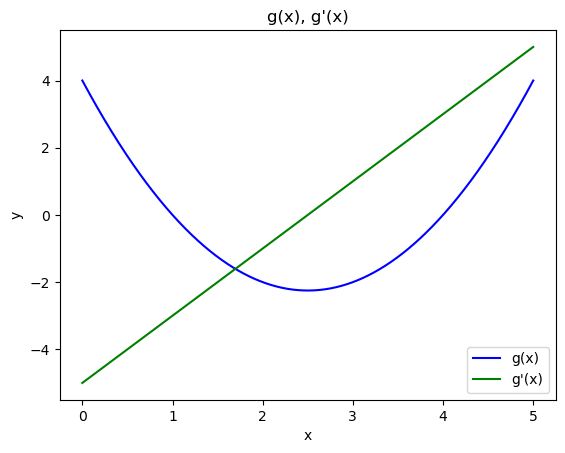

In [6]:
#8.5
def g(x):
    return (x - 1) * (x - 4)
def gp(x):
    return 2 * x - 5
x = np.linspace(0, 5, 1000)
plt.plot(x, g(x), "b-", label="g(x)")
plt.plot(x, gp(x), "g-", label="g'(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("g(x), g'(x)")
plt.legend()
plt.show()

In [7]:
#8.6
a, b = bisection(g,0,2.5)
for i in range(4):
    a, b = bisection(g,a,b)
print(a, b)
#root of x=1 approached

0.9375 1.015625


In [8]:
#8.7
a, b = secant(g,0,2.5)
for i in range(4):
    a, b = secant(g,a,b)
print(a, b)
#root of x=1 approached more closely than bisection

1.0461538461538462 0.9970674486803519


In [9]:
#8.8
#x = newton(g,gp,2.5)
#for i in range(4):
#    x = newton(g,gp,x)
#print(x)
#g'(x) is 0 at x=2.5, so zerodivisionerror
x = newton(g,gp,2.4)
for i in range(4):
    x = newton(g,gp,x)
print(x)
#root of x=1 approached more closely than bisect,
#ut less than secant

0.9575892905079796


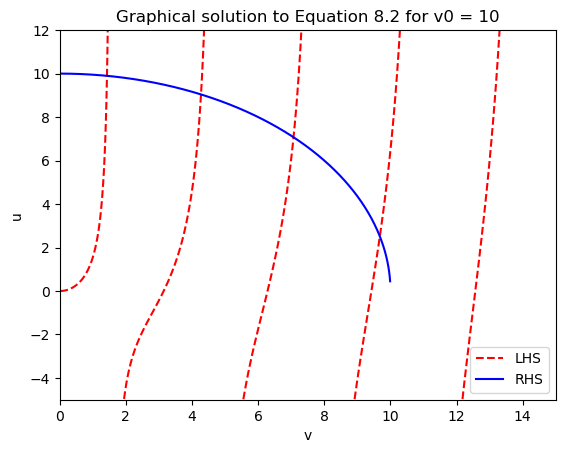

In [10]:
#8.9
v = np.linspace(0, np.pi/2, 100)[1:-1]
plt.plot(v, v*np.tan(v), "r--", label="LHS")
v = np.linspace(np.pi/2, 3*np.pi/2, 100)[1:-1]
plt.plot(v, v*np.tan(v), "r--")
v = np.linspace(3*np.pi/2, 5*np.pi/2, 100)[1:-1]
plt.plot(v, v*np.tan(v), "r--")
v = np.linspace(5*np.pi/2, 7*np.pi/2, 100)[1:-1]
plt.plot(v, v*np.tan(v), "r--")
v = np.linspace(7*np.pi/2, 9*np.pi/2, 100)[1:-1]
plt.plot(v, v*np.tan(v), "r--")
v = np.linspace(0, 10, 1000)[1:-1]
plt.plot(v, np.sqrt(10**2 - v**2), "b-", label="RHS")
plt.xlabel("v")
plt.ylabel("u")
plt.title("Graphical solution to Equation 8.2 for v0 = 10")
plt.legend()
ax = plt.gca()
ax.set_xlim([0, 15])
ax.set_ylim([-5, 12])
plt.show()

In [11]:
#8.10
def h(x):
    return x * np.tan(x) - np.sqrt(10**2 - x**2)
for v in [1,1.5,2,4.5]:
    print(np.around(h(v),2))

-8.39
11.27
-14.17
11.94


In [12]:
#8.11
import sys
#for v in range(11):
#    print(np.around(h(v),2))
#root 1
a, b = bisection(h,1,2)
while np.abs(a - b) > 10 * sys.float_info.epsilon:
    a, b = bisection(h,a,b)
print("root 1 is approximately", a)
#root 2
a, b = bisection(h,4,5)
while np.abs(a - b) > 10 * sys.float_info.epsilon:
    a, b = bisection(h,a,b)
print("root 2 is approximately", a)
#root 3
a, b = bisection(h,7,8)
while np.abs(a - b) > 10 * sys.float_info.epsilon:
    a, b = bisection(h,a,b)
print("root 3 is approximately", a)
#root 4
a, b = bisection(h,9,10)
while np.abs(a - b) > 10 * sys.float_info.epsilon:
    a, b = bisection(h,a,b)
print("root 4 is approximately", a)

root 1 is approximately 1.4275517787645935
root 2 is approximately 4.271095337633186
root 3 is approximately 7.068891237342669
root 4 is approximately 9.678884018488255


In [13]:
#8.12
#root 1
a, b = secant(h,1,1.5)
while np.abs(a - b) > 10 * sys.float_info.epsilon:
    a, b = secant(h,a,b)
print("root 1 is approximately", a)
#root 2
a, b = secant(h,4,4.4)
while np.abs(a - b) > 10 * sys.float_info.epsilon:
    a, b = bisection(h,a,b)
print("root 2 is approximately", a)
#root 3
a, b = secant(h,7,7.5)
while np.abs(a - b) > 10 * sys.float_info.epsilon:
    a, b = bisection(h,a,b)
print("root 3 is approximately", a)
#root 4
a, b = secant(h,9,10)
while np.abs(a - b) > 10 * sys.float_info.epsilon:
    a, b = bisection(h,a,b)
print("root 4 is approximately", a)

root 1 is approximately 1.427551778764594
root 2 is approximately 4.271095337633188
root 3 is approximately 7.068891237342671
root 4 is approximately 9.678884018488256


In [14]:
#8.13
def hp(x):
    return np.tan(x) + x * (1/np.cos(x) ** 2) + x/np.sqrt(10**2 - x**2)
for v in [1,1.5,2,4.5]:
    print(np.around(hp(v),2))

5.08
314.03
9.57
106.41


In [15]:
#8.14
#root 1
x = newton(h,hp,1)
while h(x) > 100 * sys.float_info.epsilon:
    x = newton(h,hp,x)
print("root 1 is approximately", x)
#root 2
x = newton(h,hp,4)
while h(x) > 100 * sys.float_info.epsilon:
    x = newton(h,hp,x)
print("root 2 is approximately", x)
#root 3
x = newton(h,hp,7)
while h(x) > 100 * sys.float_info.epsilon:
    x = newton(h,hp,x)
print("root 3 is approximately", x)
#root 4
x = newton(h,hp,9)
while h(x) > 100 * sys.float_info.epsilon:
    x = newton(h,hp,x)
print("root 4 is approximately", x)

root 1 is approximately 2.6509455439652747
root 2 is approximately 4.271095337633188
root 3 is approximately 7.06889123734267
root 4 is approximately 9.676884689933187


In [16]:
#8.15
def i(x):
    return np.sqrt(10**2 - x**2) + x/np.tan(x)
def ip(x):
    return -x/(np.sin(x) ** 2) + 1/np.tan(x) - x/np.sqrt(10**2 - x**2)
#root 1
x = newton(i,ip,2.8)
while i(x) > 10 * sys.float_info.epsilon:
    x = newton(i,ip,x)
print("root 1 is approximately", x)
#root 2
x = newton(i,ip,5.7)
while i(x) > 10 * sys.float_info.epsilon:
    x = newton(i,ip,x)
print("root 2 is approximately", x)
#root 3
x = newton(i,ip,8.4)
while i(x) > 10 * sys.float_info.epsilon:
    x = newton(i,ip,x)
print("root 3 is approximately", x)

root 1 is approximately 2.86146383755575
root 2 is approximately 5.679841379025659
root 3 is approximately 8.42355419075512


In [17]:
#8.16
def h(x):
    return x * np.tan(x) - np.sqrt(20 - x**2)
def hp(x):
    return np.tan(x) + x * (1/np.cos(x) ** 2) + x/np.sqrt(20 - x**2)
#root 1
x = newton(h,hp,1.5)
while h(x) > 100 * sys.float_info.epsilon:
    x = newton(h,hp,x)
print("root 1 is approximately", x)
#root 2
x = newton(h,hp,3.5)
while h(x) > 100 * sys.float_info.epsilon:
    x = newton(h,hp,x)
print("root 2 is approximately", x)

root 1 is approximately 1.2804218631112423
root 2 is approximately 3.727134687994569


In [18]:
#8.17
def trapezoid(f, a, b, n):
    h = (b - a)/(n - 1)
    I = (f(a) + f(b)) * h/2
    for i in range(n):
        I = I + h * f(a + h * i)
    return I
print(np.around(trapezoid(np.sin,0,np.pi/2,2),2))
print(np.around(trapezoid(np.sin,0,np.pi/2,3),2))
print(np.around(trapezoid(np.sin,0,np.pi/2,4),2))

2.36
1.73
1.5


In [19]:
#8.18
def itertrap(f, a, b, s, m):
    s = s/2
    h = (b - a)/2**m
    for i in range(1, 2**(m - 1) + 1):
        s = s + h * f(a + (2 * i - 1) * h)
    m = m + 1
    return s, m
print(np.around(itertrap(np.sin,np.pi/2,np.pi,0.00,1),2))
print(np.around(itertrap(np.sin,np.pi/2,np.pi,0.56,2),2))
print(np.around(itertrap(np.sin,np.pi/2,np.pi,0.79,3),2))

[0.56 2.  ]
[0.79 3.  ]
[0.9 4. ]


In [20]:
#8.19
s, m = itertrap(np.sin, 0, np.pi, 0, 1)
st = np.pi
while np.abs(s - st) >= 10 ** -6:
    st = s
    s, m = itertrap(np.sin, 0, np.pi, s, m)
print("the integral evaluates to", s)

the integral evaluates to 1.9999999019542865


In [21]:
#8.20
def tt(x):
    return 1/np.sqrt(1-(np.sin(1/2) ** 2) * np.sin(x) ** 2)

s, m = itertrap(tt, 0, np.pi/2, (tt(0)+tt(np.pi/2))*(np.pi/2-0)/2, 1)
st = (tt(0)+tt(np.pi/2))*(np.pi/2-0)/2
#print(st * 2/np.pi)
#print(s * 2/np.pi)
while np.abs(s - st) >= 10 ** -6:
    st = s
    s, m = itertrap(tt, 0, np.pi/2, s, m)
    #print(s * 2/np.pi)
print("the ratio of the periods is approximately", s * 2/np.pi)

the ratio of the periods is approximately 1.066334245579963


In [22]:
#8.21
def romberg(f, a, b, R):
    R1 = np.array([])
    s, m = itertrap(f, a, b, R[0], R.size)
    R1 = np.append(R1, s)
    #R_{m1} is itertrap result
    for j in range(R.size):
        R1 = np.append(R1, (4 ** (j + 1) * R1[j] - R[j])/(4 ** (j + 1) - 1))
    return R1

R = np.array([0.0])
R = romberg(np.sin, 0, np.pi, R)
R = romberg(np.sin, 0, np.pi, R)
R = romberg(np.sin, 0, np.pi, R)
print("the integral evaluates to", R[R.size - 1])

the integral evaluates to 2.0000055499796705


In [23]:
#8.22
R = np.array([(tt(0)+tt(np.pi/2))*(np.pi/2-0)/2])
st = R[R.size - 1]
#print(R * 2/np.pi)
R = romberg(tt, 0, np.pi/2, R)
while np.abs(R[R.size - 1] - st) >= 10 ** -6:
    #print(R * 2/np.pi)
    st = R[R.size - 1]
    R = romberg(tt, 0, np.pi/2, R)
    #print(R)
ratio = R[R.size - 1] * 2/np.pi
print("the ratio between the periods is approximately", ratio)
print("the period is approximately", 2*np.pi*ratio, "sqrt(L/g)")

the ratio between the periods is approximately 1.0663342455947329
the period is approximately 6.699975664463254 sqrt(L/g)
